In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [3]:
train_df=pd.read_csv("../input/train.csv")
test_df=pd.read_csv("../input/test.csv")
combine=[train_df,test_df]

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_df.info()
print("\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

In [8]:
print(train_df.isnull().sum())
print("\n")
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
#checking relation between attributes
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [12]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


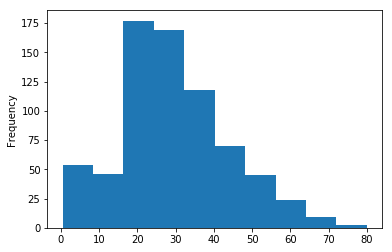

In [14]:
#Visual representation
train_df["Age"].plot.hist()

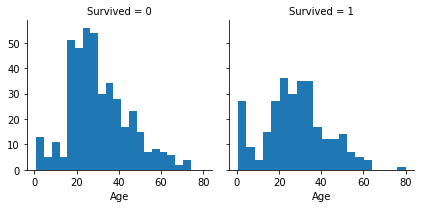

In [15]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


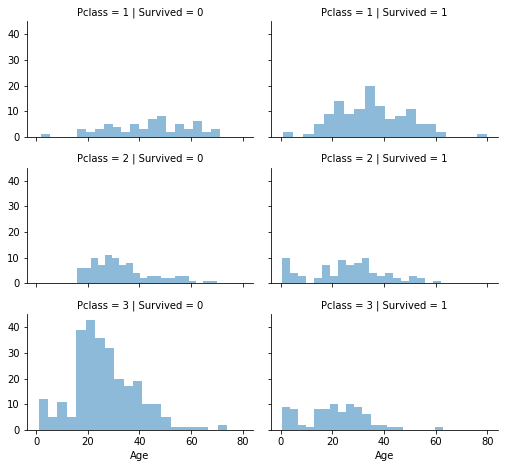

In [16]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


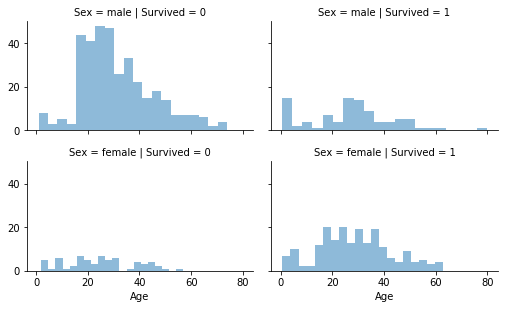

In [17]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [18]:
#train_df[["Embarked","Survived"]].groupby(["Embarked"]).count(train_df["Survived"]==1).plot.bar()
#train_df[["Embarked","Survived"]].groupby(["Embarked"]).mean().plot.bar()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


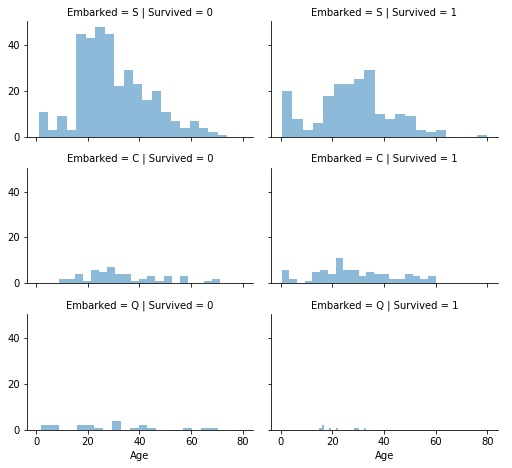

In [19]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


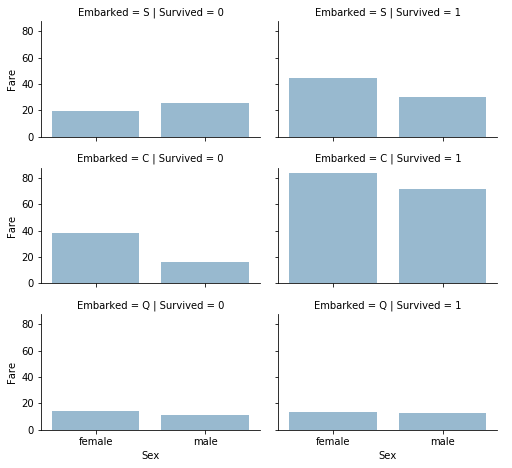

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()


In [21]:
#removing the columns not required
print(train_df.shape,test_df.shape)
test_df.drop(["Ticket","Cabin"],axis=1,inplace=True)
train_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
combine=[train_df,test_df]
print(train_df.shape,test_df.shape)

(891, 12) (418, 11)
(891, 10) (418, 9)


In [22]:
for data in combine:
    data["Sex"]=data["Sex"].map({'female':1,'male': 0})
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


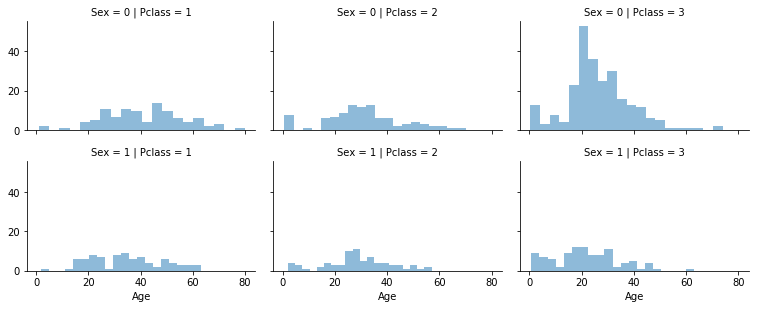

In [24]:
grid = sns.FacetGrid(train_df, col='Pclass', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [25]:
for data in combine:
    data["Age"]=data["Age"].fillna(data["Age"].mode())

In [26]:
for data in combine:
    data["family_size"]=data["Parch"]+data["SibSp"]+1
train_df[["family_size","Survived"]].groupby(["family_size"],as_index=False).mean().sort_values(by="family_size",ascending=False)

,family_size,Survived
8,11,0.000000
7,8,0.000000
6,7,0.333333
5,6,0.136364
4,5,0.200000
3,4,0.724138
2,3,0.578431
1,2,0.552795
0,1,0.303538


In [27]:
print(train_df.shape,test_df.shape)
train_df.drop(["Parch","SibSp"],axis=1,inplace=True)
test_df.drop(["Parch","SibSp"],axis=1,inplace=True)
print(train_df.shape,test_df.shape)

(891, 11) (418, 10)
(891, 9) (418, 8)


In [28]:
print(train_df.info())
print(test_df.info())
combine=[train_df,test_df]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
Fare           891 non-null float64
Embarked       889 non-null object
family_size    891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
Fare           417 non-null float64
Embarked       418 non-null object
family_size    418 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB
None


In [29]:
for data in combine:
    k=data["Age"].mode()
    print(k)
    data["Age"]=data["Age"].fillna(k)

    

0    24.0
dtype: float64
0    21.0
1    24.0
dtype: float64


In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,S,1


In [31]:
for data in combine:
    data["Age"].fillna((data["Age"].mean()),inplace=True)
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Embarked       889 non-null object
family_size    891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
Fare           417 non-null float64
Embarked       418 non-null object
family_size    418 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB
None


In [32]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for data in combine:
    data["Embarked"]=data["Embarked"].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null int64
family_size    891 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
Fare           417 non-null float64
Embarked       418 non-null int64
family_size    418 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB
None


In [34]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,892,3,"Kelly, Mr. James",0,34.5,7.8292,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,7.0000,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,9.6875,2,1
3,895,3,"Wirz, Mr. Albert",0,27.0,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,12.2875,0,3


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

In [39]:
X_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,1,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,2
2,3,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,2
4,5,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,1


In [40]:
Y_train=train_df["Survived"]
X_train=train_df.drop(["Survived"],axis=1)
X2_train=train_df.drop(["Survived","PassengerId","Name"],axis=1)
X_test=test_df.drop(["PassengerId","Name"],axis=1).copy()
print(Y_train.shape,X_train.shape,X_test.shape)
print(X_test.columns,"\n",X_train.columns,X2_train.columns)

(891,) (891, 8) (418, 6)
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family_size'], dtype='object') 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked',
       'family_size'],
      dtype='object') Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family_size'], dtype='object')


In [45]:
X_test.head(5)

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,0,34.5,7.8292,2,1
1,3,1,47.0,7.0000,0,2
2,2,0,62.0,9.6875,2,1
3,3,0,27.0,8.6625,0,1
4,3,1,22.0,12.2875,0,3


In [47]:
logreg=LogisticRegression()
logreg.fit(X2_train, Y_train)
Y_pred=logreg.predict(X_test)
acc_log = round(logreg.score(X2_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.13

In [53]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X2_train, Y_train)
melb_preds = forest_model.predict(X_test)
acc_random_tree = round(forest_model.score(X2_train, Y_train) * 100, 2)
acc_random_tree


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


85.34

In [57]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X2_train, Y_train)
Y2_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X2_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [56]:
decision_tree=DecisionTreeRegressor(random_state=1)
decision_tree.fit(X2_train,Y_train)
dec_pred=decision_tree.predict(X_test)
acc_log = round(decision_tree.score(X2_train, Y_train) * 100, 2)
acc_log

95.44

In [59]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y2_pred
    })
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [61]:
test = pd.read_csv('../input/test.csv')
test['Survived'] = Y2_pred
submission = test[['PassengerId', 'Survived']]
submission.to_csv('logistic_decisiontrees_randomforests.csv', index=False)

In [65]:
submission["Survived"].value_counts()

0    275
1    143
Name: Survived, dtype: int64